In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [76]:
path = r'C:\Users\Gili\Documents\Max_Planck\Hierarchical-modelling\data\agent_subject\basic_task' # use your path
dom_levels = [["0","-1"], ["-1","0"], ["0","0"]]


In [80]:
target_dir = "simulation_results"
all_data = []
for dom_level in dom_levels:
    agent_dom = dom_level[0]
    subject_dom = dom_level[1]    
    new_path = os.path.join(path, f'DoM{subject_dom}_subject_DoM{agent_dom}_agent_softmax_0.5', target_dir)
    all_files = glob.glob(os.path.join(new_path, "*.csv"))
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df['agent_DoM'] = agent_dom
        df['subject_DoM'] = subject_dom        
        li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
    all_data.append(frame)
frame = pd.concat(all_data, axis=0, ignore_index=True)

First, we analyze the cumulative reward per instance: $\gamma_{subject}, \alpha_{subject}, \gamma_{agent}$ for each dyad

In [109]:
frame.shape

(16000, 10)

In [103]:
mean_reward_per_trial = frame.groupby(["trial_number","subject_threshold","subject_alpha","agent_threshold","agent_DoM","subject_DoM"]).agg(agent_reward = ('agent_reward', 'mean'), subject_reward = ('subject_reward','mean')).reset_index()

In [108]:
mean_reward_per_trial.shape

(1600, 8)

In [114]:
cumulative_reward = mean_reward_per_trial.groupby(["trial_number","subject_threshold","subject_alpha","agent_threshold","agent_DoM","subject_DoM"]).sum().groupby(level=0).agg(agent_reward = ('agent_reward','cumsum'),subject_reward = ('subject_reward','cumsum')).reset_index()

In [115]:
cumulative_reward.head()

,trial_number,subject_threshold,subject_alpha,agent_threshold,agent_DoM,subject_DoM,agent_reward,subject_reward
0,1,0.1,0.0,0.0,0,0,0.310,0.190
1,1,0.1,0.0,0.2,0,0,0.620,0.480
2,1,0.1,0.0,0.5,0,0,0.875,0.725
3,1,0.1,0.0,0.8,0,0,1.225,0.975
4,1,0.1,0.2,0.0,0,0,1.645,1.355


In [116]:
unified_data = cumulative_reward.melt(id_vars=["trial_number","subject_threshold","subject_alpha","agent_threshold","agent_DoM","subject_DoM"], value_vars=['agent_reward','subject_reward'])

In [117]:
unified_data.head()

,trial_number,subject_threshold,subject_alpha,agent_threshold,agent_DoM,subject_DoM,variable,value
0,1,0.1,0.0,0.0,0,0,agent_reward,0.310
1,1,0.1,0.0,0.2,0,0,agent_reward,0.620
2,1,0.1,0.0,0.5,0,0,agent_reward,0.875
3,1,0.1,0.0,0.8,0,0,agent_reward,1.225
4,1,0.1,0.2,0.0,0,0,agent_reward,1.645


In [118]:
sns.relplot(
    data=unified_data, x='trial_number', y='value',hue="variable", size="subject_DoM",
    col='subject_threshold', row='agent_threshold', kind='line')

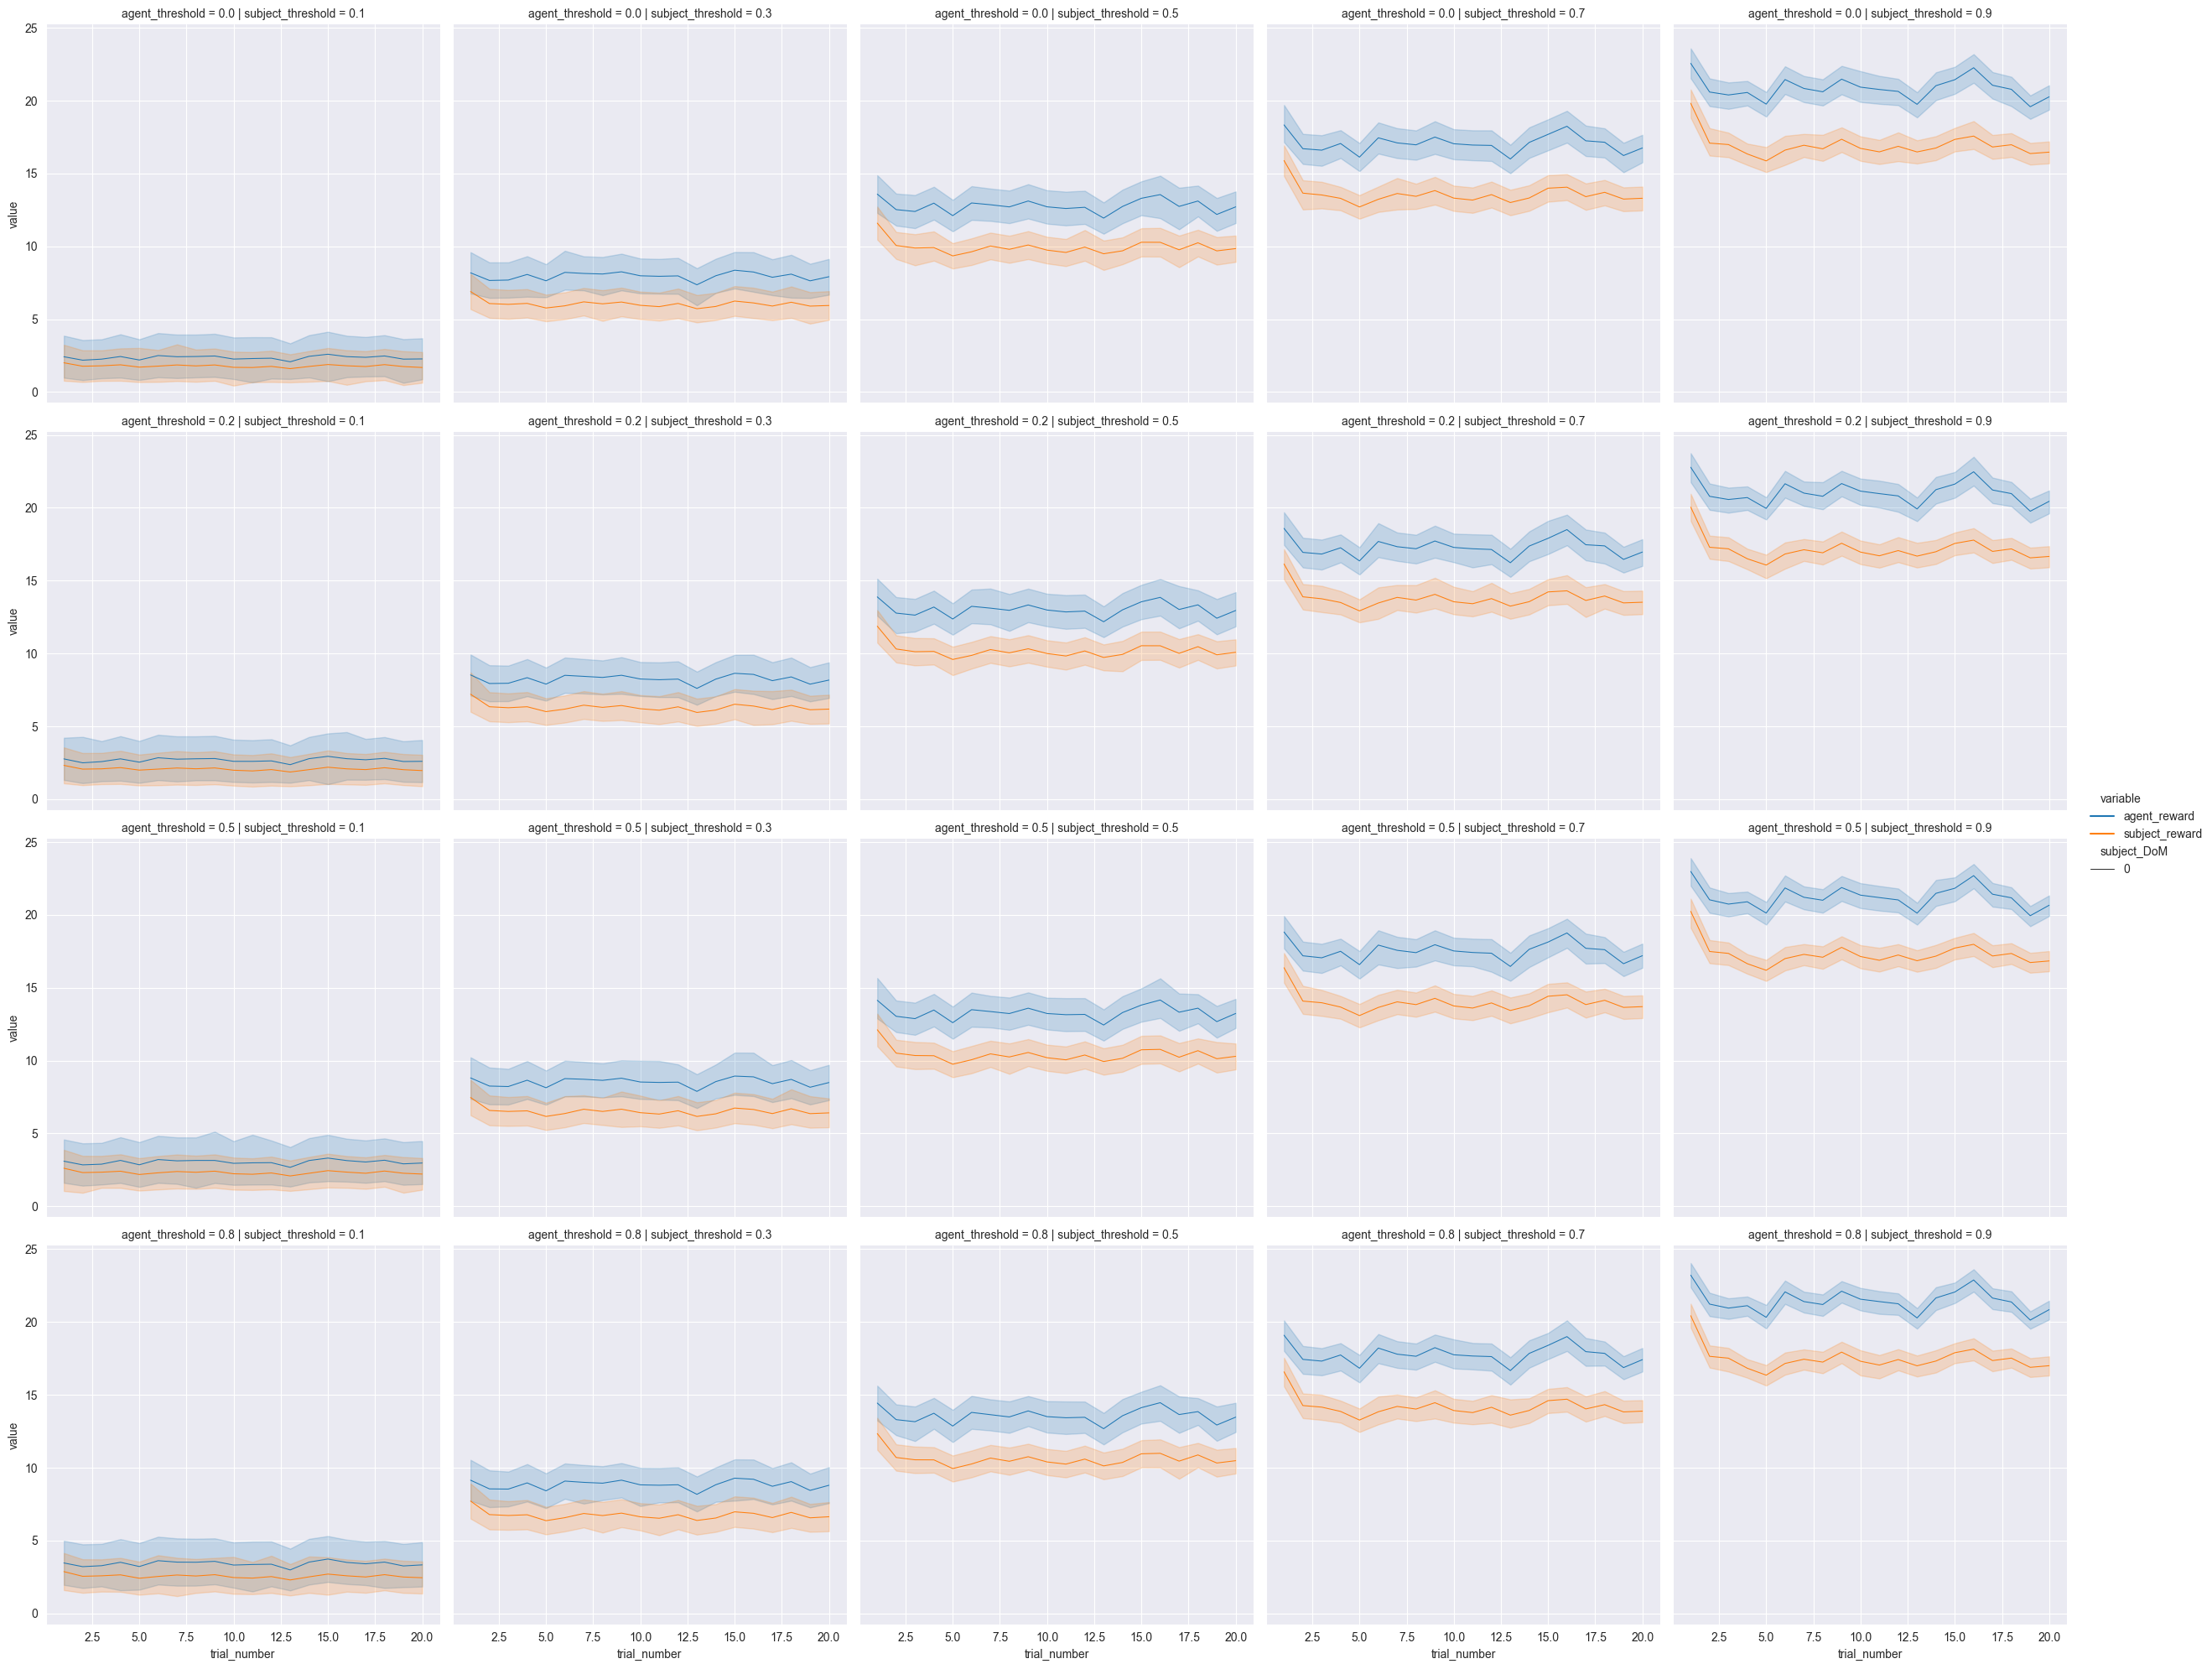

In [119]:
plt.show()